In [1]:
import tensorflow as tf
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## MLP (Multilayer perceptron)

#### Data

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

#### Feature column

In [3]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]

#### DNN

In [4]:
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\User\\AppData\\Local\\Temp\\tmpfs5dfgxe', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001BC64548400>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into

INFO:tensorflow:global_step/sec: 596.08
INFO:tensorflow:loss = 0.09501578, step = 7201 (0.168 sec)
INFO:tensorflow:global_step/sec: 629.617
INFO:tensorflow:loss = 0.30582145, step = 7301 (0.159 sec)
INFO:tensorflow:global_step/sec: 577.834
INFO:tensorflow:loss = 0.70389116, step = 7401 (0.173 sec)
INFO:tensorflow:global_step/sec: 590.751
INFO:tensorflow:loss = 0.4837041, step = 7501 (0.169 sec)
INFO:tensorflow:global_step/sec: 608.709
INFO:tensorflow:loss = 0.42072725, step = 7601 (0.164 sec)
INFO:tensorflow:global_step/sec: 599.158
INFO:tensorflow:loss = 0.31667778, step = 7701 (0.167 sec)
INFO:tensorflow:global_step/sec: 599.902
INFO:tensorflow:loss = 0.5218763, step = 7801 (0.167 sec)
INFO:tensorflow:global_step/sec: 590.376
INFO:tensorflow:loss = 3.1708968, step = 7901 (0.169 sec)
INFO:tensorflow:global_step/sec: 557.523
INFO:tensorflow:loss = 3.524906, step = 8001 (0.179 sec)
INFO:tensorflow:global_step/sec: 598.577
INFO:tensorflow:loss = 0.70957124, step = 8101 (0.167 sec)
INFO:t

INFO:tensorflow:global_step/sec: 605.606
INFO:tensorflow:loss = 0.12672938, step = 15401 (0.181 sec)
INFO:tensorflow:global_step/sec: 529.78
INFO:tensorflow:loss = 0.18127003, step = 15501 (0.173 sec)
INFO:tensorflow:global_step/sec: 620.872
INFO:tensorflow:loss = 0.11557211, step = 15601 (0.161 sec)
INFO:tensorflow:global_step/sec: 600.077
INFO:tensorflow:loss = 0.07573223, step = 15701 (0.167 sec)
INFO:tensorflow:global_step/sec: 593.306
INFO:tensorflow:loss = 0.016519165, step = 15801 (0.184 sec)
INFO:tensorflow:global_step/sec: 543.882
INFO:tensorflow:loss = 0.049179822, step = 15901 (0.168 sec)
INFO:tensorflow:global_step/sec: 602.512
INFO:tensorflow:loss = 0.008583545, step = 16001 (0.166 sec)
INFO:tensorflow:global_step/sec: 599.662
INFO:tensorflow:loss = 0.16171613, step = 16101 (0.167 sec)
INFO:tensorflow:global_step/sec: 602.079
INFO:tensorflow:loss = 0.050387822, step = 16201 (0.166 sec)
INFO:tensorflow:global_step/sec: 601.372
INFO:tensorflow:loss = 0.13443941, step = 16301

INFO:tensorflow:global_step/sec: 602.142
INFO:tensorflow:loss = 0.04517109, step = 23501 (0.166 sec)
INFO:tensorflow:global_step/sec: 522.187
INFO:tensorflow:loss = 0.061917327, step = 23601 (0.192 sec)
INFO:tensorflow:global_step/sec: 568.101
INFO:tensorflow:loss = 0.031991474, step = 23701 (0.177 sec)
INFO:tensorflow:global_step/sec: 596.512
INFO:tensorflow:loss = 0.042791225, step = 23801 (0.167 sec)
INFO:tensorflow:global_step/sec: 548.547
INFO:tensorflow:loss = 0.06538541, step = 23901 (0.182 sec)
INFO:tensorflow:global_step/sec: 588.678
INFO:tensorflow:loss = 0.0374903, step = 24001 (0.170 sec)
INFO:tensorflow:global_step/sec: 559.28
INFO:tensorflow:loss = 0.010843858, step = 24101 (0.179 sec)
INFO:tensorflow:global_step/sec: 634.135
INFO:tensorflow:loss = 0.040663123, step = 24201 (0.158 sec)
INFO:tensorflow:global_step/sec: 560.826
INFO:tensorflow:loss = 0.10878283, step = 24301 (0.178 sec)
INFO:tensorflow:global_step/sec: 600.669
INFO:tensorflow:loss = 0.060058877, step = 2440

INFO:tensorflow:global_step/sec: 566.961
INFO:tensorflow:loss = 0.07291837, step = 31601 (0.176 sec)
INFO:tensorflow:global_step/sec: 602.438
INFO:tensorflow:loss = 0.012384724, step = 31701 (0.166 sec)
INFO:tensorflow:global_step/sec: 549.931
INFO:tensorflow:loss = 0.018737506, step = 31801 (0.197 sec)
INFO:tensorflow:global_step/sec: 503.301
INFO:tensorflow:loss = 0.009693525, step = 31901 (0.183 sec)
INFO:tensorflow:global_step/sec: 597.365
INFO:tensorflow:loss = 0.037853785, step = 32001 (0.167 sec)
INFO:tensorflow:global_step/sec: 597.846
INFO:tensorflow:loss = 0.032708425, step = 32101 (0.167 sec)
INFO:tensorflow:global_step/sec: 544.233
INFO:tensorflow:loss = 0.0028217246, step = 32201 (0.184 sec)
INFO:tensorflow:global_step/sec: 601.435
INFO:tensorflow:loss = 0.06431848, step = 32301 (0.166 sec)
INFO:tensorflow:global_step/sec: 505.445
INFO:tensorflow:loss = 0.0179473, step = 32401 (0.198 sec)
INFO:tensorflow:global_step/sec: 591.616
INFO:tensorflow:loss = 0.05388844, step = 32

INFO:tensorflow:global_step/sec: 465.815
INFO:tensorflow:loss = 0.07889389, step = 39701 (0.215 sec)
INFO:tensorflow:global_step/sec: 543.645
INFO:tensorflow:loss = 0.026592474, step = 39801 (0.184 sec)
INFO:tensorflow:global_step/sec: 500.366
INFO:tensorflow:loss = 0.012801182, step = 39901 (0.200 sec)
INFO:tensorflow:global_step/sec: 592.143
INFO:tensorflow:loss = 0.019041475, step = 40001 (0.169 sec)
INFO:tensorflow:global_step/sec: 598.099
INFO:tensorflow:loss = 0.00054532755, step = 40101 (0.167 sec)
INFO:tensorflow:global_step/sec: 547.261
INFO:tensorflow:loss = 0.012787733, step = 40201 (0.183 sec)
INFO:tensorflow:global_step/sec: 600.947
INFO:tensorflow:loss = 0.0045490786, step = 40301 (0.166 sec)
INFO:tensorflow:global_step/sec: 467.179
INFO:tensorflow:loss = 0.041065298, step = 40401 (0.214 sec)
INFO:tensorflow:global_step/sec: 535.25
INFO:tensorflow:loss = 0.0409781, step = 40501 (0.187 sec)
INFO:tensorflow:global_step/sec: 504.236
INFO:tensorflow:loss = 0.0020836173, step 

#### Evaluate

In [5]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-12-07-06:27:58
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\User\AppData\Local\Temp\tmpfs5dfgxe\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-12-07-06:27:59
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9786, average_loss = 0.114675455, global_step = 44000, loss = 14.51588
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: C:\Users\User\AppData\Local\Temp\tmpfs5dfgxe\model.ckpt-44000


## Low-level API

In [6]:
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

#### 自定義 Layer函數

In [7]:
# layer
# 包含 輸入、神經元數量、名稱、激活函數
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1]) # get_shape 是 tensor 的方法
        
        stddev = 2/np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="weight")
        b = tf.Variable(tf.zeros([n_neurons]), name="biases")
        z = tf.matmul(X, W) + b
        if activation=="relu":
            return tf.nn.relu(z)
        else:
            return z

In [8]:
with tf.name_scope("dnn1"):
    hidden1 = neuron_layer(X, n_hidden1, "hidden1", activation="relu")
    hidden2 = neuron_layer(hidden1, n_hidden2, "hidden2", activation="relu") # 這層的輸入是上一層的輸出 !
    logits = neuron_layer(hidden2, n_outputs, "outputs")

## 建構(使用Tensorflow 函數)

In [9]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

# 神經網路
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    #y_proba = tf.nn.softmax(logits)

In [10]:
# 成本函數
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [11]:
# 梯度下降 Optimizer
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [12]:
# 模型求值
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [13]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

## 運行

In [14]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

n_epochs = 50
batch_size = 50

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [15]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images,
                                       y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy", acc_test)
    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.9 Test accuracy 0.9053
1 Train accuracy: 0.94 Test accuracy 0.9222
2 Train accuracy: 0.92 Test accuracy 0.93
3 Train accuracy: 0.96 Test accuracy 0.9372
4 Train accuracy: 0.94 Test accuracy 0.9427
5 Train accuracy: 0.94 Test accuracy 0.9471
6 Train accuracy: 0.98 Test accuracy 0.95
7 Train accuracy: 0.96 Test accuracy 0.9526
8 Train accuracy: 0.96 Test accuracy 0.9578
9 Train accuracy: 0.94 Test accuracy 0.9584
10 Train accuracy: 0.98 Test accuracy 0.9626
11 Train accuracy: 0.94 Test accuracy 0.9636
12 Train accuracy: 0.98 Test accuracy 0.966
13 Train accuracy: 0.92 Test accuracy 0.965
14 Train accuracy: 1.0 Test accuracy 0.9679
15 Train accuracy: 1.0 Test accuracy 0.9691
16 Train accuracy: 0.98 Test accuracy 0.9695
17 Train accuracy: 0.96 Test accuracy 0.9687
18 Train accuracy: 1.0 Test accuracy 0.9717
19 Train accuracy: 1.0 Test accuracy 0.9712
20 Train accuracy: 1.0 Test accuracy 0.9721
21 Train accuracy: 1.0 Test accuracy 0.9717
22 Train accuracy: 1.0 Test accur

### 使用訓練完成的神經網絡

In [16]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt")
    X_data = X_test[:100]
    Z = logits.eval(feed_dict={X: X_data})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


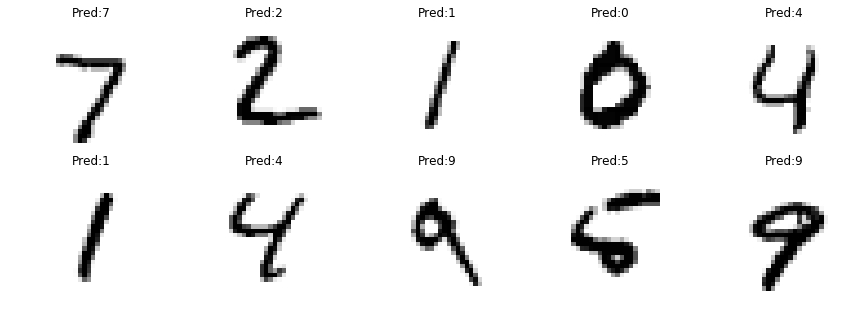

In [17]:
plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.axis("off")
    plt.title("Pred:{}".format(y_pred[i]))
    plt.imshow(X_test[i].reshape(28,28), cmap="binary")
plt.show()

### 批量歸一化

In [18]:
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
learning_rate = 0.01

In [19]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [20]:
from functools import partial
reset_graph()
batch_norm_momentum = 0.9

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")
training = tf.placeholder_with_default(False, shape=(), name='training')

with tf.name_scope("dnn"):
    he_init = tf.variance_scaling_initializer()
    
    my_batch_norm_layer = partial(
        tf.layers.batch_normalization,
        training=training,
        momentum=batch_norm_momentum)
    
    my_dense_layer = partial(
        tf.layers.dense,
        kernel_initializer=he_init
    )
    
    hidden1 = my_dense_layer(X, n_hidden1, name="hidden1")
    bn1 = tf.nn.elu(my_batch_norm_layer(hidden1))
    hidden2 = my_dense_layer(bn1, n_hidden2, name="hidden2")
    bn2 = tf.nn.elu(my_batch_norm_layer(hidden2))
    logits_before_bn = my_dense_layer(bn2, n_outputs, name="outputs")
    logits = my_batch_norm_layer(logits_before_bn)
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [21]:
n_epochs = 50
batch_size = 200    

In [22]:
extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
X_val = X_train[:10000]
X_train_set = X_train[10000:]
y_val = y_train[:10000]
y_train_set = y_train[10000:]

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run([training_op, extra_update_ops],
                    feed_dict={training: True, X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: X_valid, y:y_valid})
        print(epoch, "Validation accuracy:", accuracy_val)
        
    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Validation accuracy: 0.8952
1 Validation accuracy: 0.9202
2 Validation accuracy: 0.9318
3 Validation accuracy: 0.9422
4 Validation accuracy: 0.9468
5 Validation accuracy: 0.954
6 Validation accuracy: 0.9568
7 Validation accuracy: 0.96
8 Validation accuracy: 0.962
9 Validation accuracy: 0.9638
10 Validation accuracy: 0.9662
11 Validation accuracy: 0.9682
12 Validation accuracy: 0.9672
13 Validation accuracy: 0.9696
14 Validation accuracy: 0.9706
15 Validation accuracy: 0.9704
16 Validation accuracy: 0.9718
17 Validation accuracy: 0.9726
18 Validation accuracy: 0.9738
19 Validation accuracy: 0.9742
20 Validation accuracy: 0.9738
21 Validation accuracy: 0.9746
22 Validation accuracy: 0.9742
23 Validation accuracy: 0.9758
24 Validation accuracy: 0.9756
25 Validation accuracy: 0.9752
26 Validation accuracy: 0.9748
27 Validation accuracy: 0.9758
28 Validation accuracy: 0.976
29 Validation accuracy: 0.9772
30 Validation accuracy: 0.9768
31 Validation accuracy: 0.9766
32 Validation accuracy:

In [23]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt")
    accuracy_val = accuracy.eval(feed_dict={X: X_test, y:y_test})
    print("testing set accuracy:", accuracy_val)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
testing set accuracy: 0.9793
